In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from feature_engine.encoding import RareLabelEncoder
from feature_engine.encoding import CountFrequencyEncoder
from feature_engine.outliers import Winsorizer
from feature_engine.transformation import YeoJohnsonTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import HuberRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import f_regression, mutual_info_regression

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error
from sklearn.metrics import make_scorer

In [2]:
tb_data = pd.read_csv('../data/train.csv', index_col='id')
tb_data

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,,,,,,,,,,,,,,,,,,,,,
1,A,B,A,A,B,D,A,E,C,I,...,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
2,B,A,A,A,B,B,A,E,A,F,...,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
3,A,A,A,C,B,D,A,B,C,N,...,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
4,A,A,A,C,B,D,A,E,G,K,...,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
6,A,B,A,A,B,B,A,E,C,F,...,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499993,A,B,A,C,B,B,A,E,E,L,...,0.269578,0.258655,0.363598,0.300619,0.340516,0.235711,0.383477,0.215227,0.793630,8.343538
499996,A,B,A,C,B,B,A,E,E,L,...,0.197211,0.257024,0.574304,0.227035,0.322583,0.286094,0.324874,0.306933,0.230902,7.851861
499997,A,B,A,C,B,B,A,E,C,M,...,0.449482,0.386172,0.476217,0.135947,0.502730,0.235788,0.316671,0.250286,0.349041,7.600558


In [3]:
X = tb_data.loc[:, :'cont13']
Y = tb_data['target']

In [4]:
cat_columns = X.select_dtypes(include=object).columns.to_list()
cont_columns = X.select_dtypes(include=np.number).columns.to_list()

In [5]:
base_line = Pipeline(steps=[('rare', RareLabelEncoder(n_categories=3,
                                                      variables=cat_columns)),
                            ('frequancy', CountFrequencyEncoder(encoding_method='frequency',
                                                                variables=cat_columns)),
                            ('winsorizer', Winsorizer(capping_method='iqr', tail='both',
                                                      variables=cont_columns)),
                            ('yeo_johnson', YeoJohnsonTransformer(variables=cont_columns))
                            ])
base_line.get_params()

{'memory': None,
 'steps': [('rare', RareLabelEncoder(n_categories=3,
                    variables=['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5',
                               'cat6', 'cat7', 'cat8', 'cat9'])),
  ('frequancy',
   CountFrequencyEncoder(encoding_method='frequency',
                         variables=['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5',
                                    'cat6', 'cat7', 'cat8', 'cat9'])),
  ('winsorizer',
   Winsorizer(capping_method='iqr', tail='both',
              variables=['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5',
                         'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11',
                         'cont12', 'cont13'])),
  ('yeo_johnson',
   YeoJohnsonTransformer(variables=['cont0', 'cont1', 'cont2', 'cont3', 'cont4',
                                    'cont5', 'cont6', 'cont7', 'cont8', 'cont9',
                                    'cont10', 'cont11', 'cont12', 'cont13']))],
 'verbose': False,
 'rare'

In [11]:
X_ = base_line.fit_transform(X, Y)
train_x, test_x, train_y, test_y = train_test_split(X_, Y, test_size=0.3)

C:\Users\hewar\AppData\Local\Programs\Python\Python39\lib\site-packages\feature_engine\encoding\rare_label.py:179: UserWarning: The number of unique categories for variable cat0 is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
C:\Users\hewar\AppData\Local\Programs\Python\Python39\lib\site-packages\feature_engine\encoding\rare_label.py:179: UserWarning: The number of unique categories for variable cat1 is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
C:\Users\hewar\AppData\Local\Programs\Python\Python39\lib\site-packages\feature_engine\encoding\rare_label.py:179: UserWarning: The number of unique categories for variable cat2 is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(


- find optimal feature count and importance

In [ ]:
cv = RepeatedKFold(n_splits=8, n_repeats=16)
forest = DecisionTreeRegressor(max_depth=12,
                               min_samples_split=500,
                               min_samples_leaf=250)
rfecv = []

for metric in [r2_score, mean_squared_error]:
    rfecv.append(RFECV(estimator=forest,
                       cv=cv,
                       scoring=make_scorer(metric),
                       n_jobs=-1).fit(train_x, train_y))

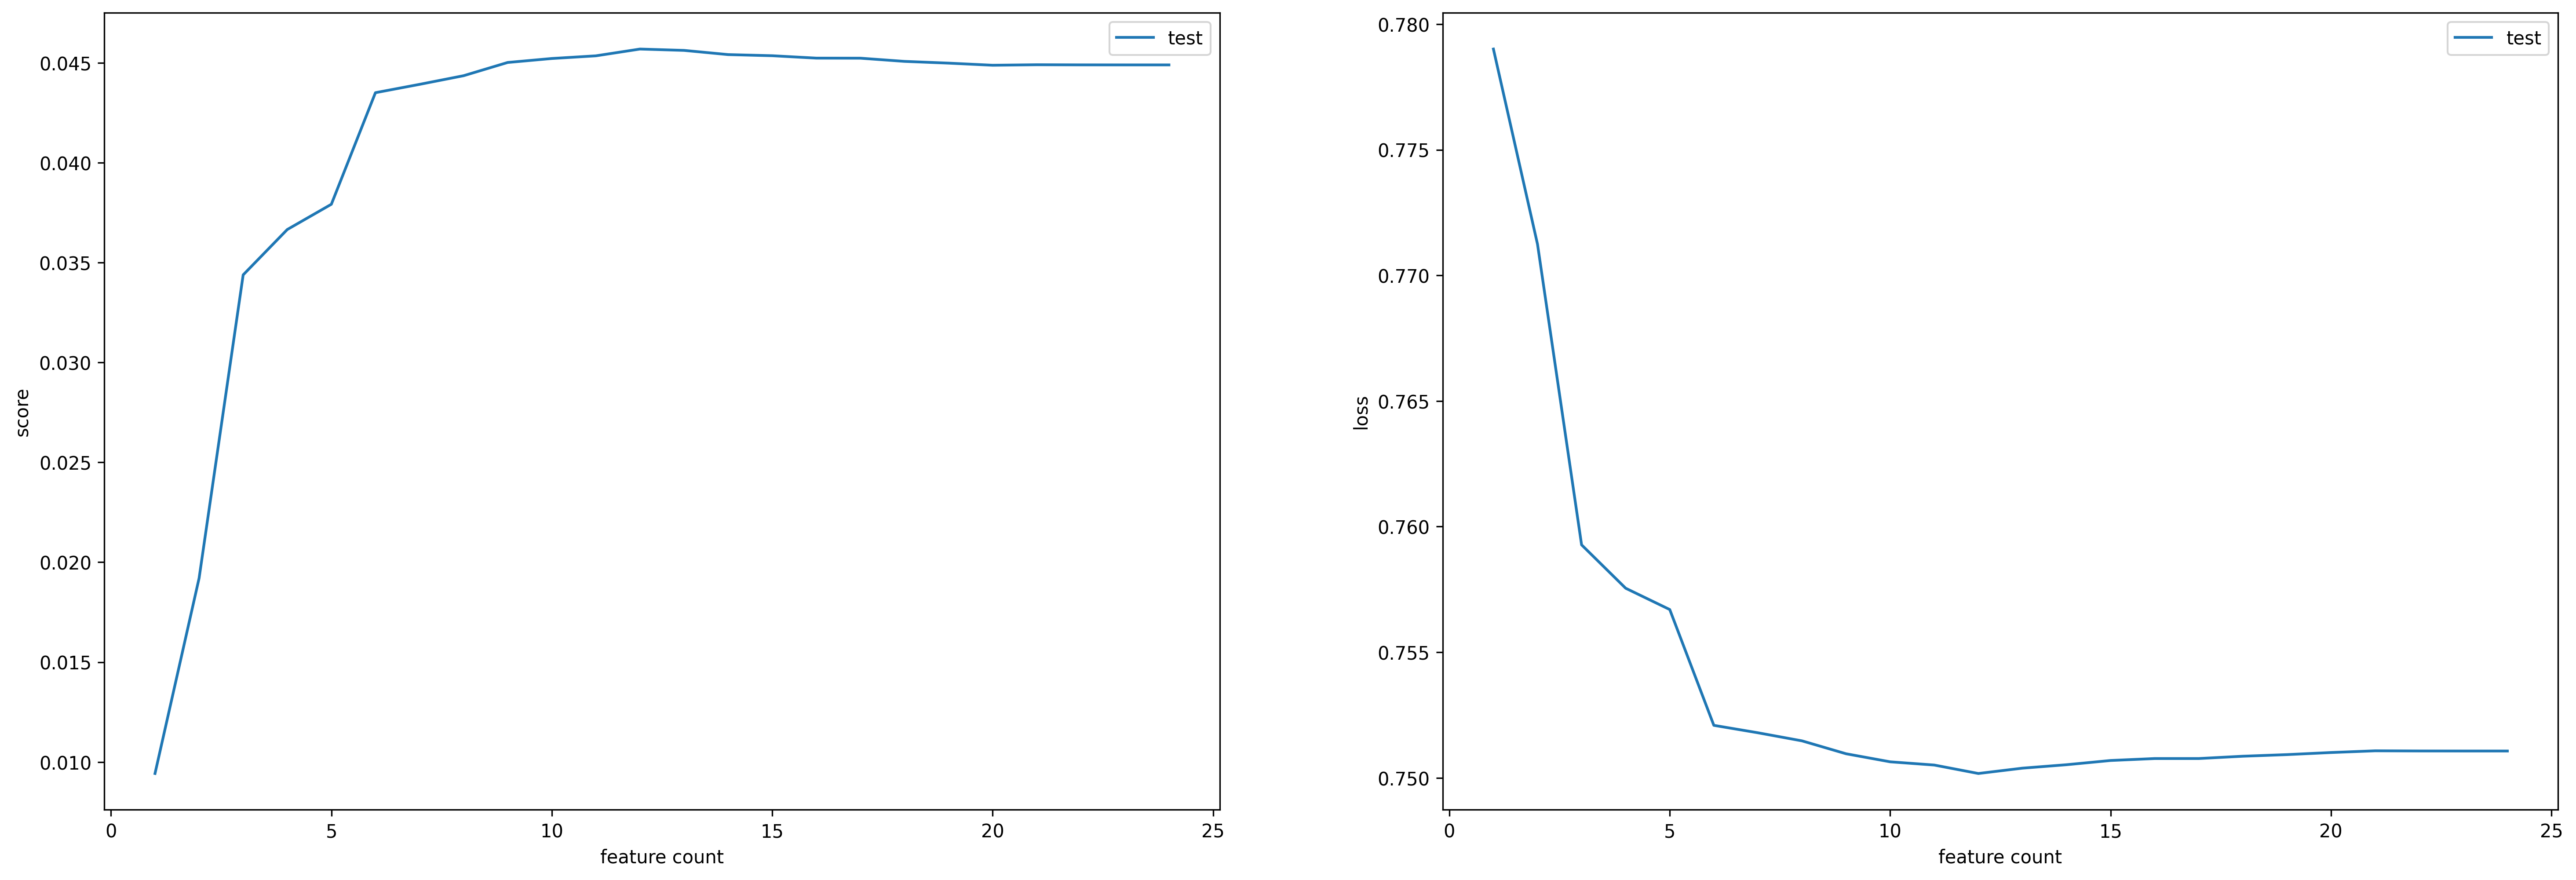

In [19]:
figure, axes = plt.subplots(nrows=1, ncols=2, figsize=[24, 8], dpi=300)
sns.lineplot(x=list(range(1, len(rfecv[0].cv_results_['mean_test_score']) + 1)),
             y=rfecv[0].cv_results_['mean_test_score'],
             label='test', ax=axes[0])
axes[0].set_xlabel('feature count')
axes[0].set_ylabel('score')
sns.lineplot(x=list(range(1, len(rfecv[1].cv_results_['mean_test_score']) + 1)),
             y=rfecv[1].cv_results_['mean_test_score'],
             label='test', ax=axes[1])
axes[1].set_xlabel('feature count')
axes[1].set_ylabel('loss')
plt.show()

In [22]:
rfecv[0].n_features_

12